# Кейс Экспансия

In [95]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/expansion.csv')
df['usual'] = df['presence_russia'].astype(str).map(lambda x: int(x.split()[0]) if x[-1] == 'х' else int(x) if x != 'nan' else np.nan)
df['franch'] = df['presence_russia'].astype(str).map(lambda x: int(x.split()[2]) if x[-1] == 'х' else 0 if x != 'nan' else np.nan)
df['presence_russia_full'] = df['presence_russia'].astype(str).map(lambda x: int(x.split()[0]) + int(x.split()[2]) if x[-1] == 'х' else int(x) if x != 'nan' else np.nan)
df

,name,contry_origin,domain,price_category,founded,presence_world,presence_russia,presence_regions,usual,franch,presence_russia_full
0,Tamaris,Германия,Обувь,Средний; Выше среднего,1967.0,1995.0,80 и 876 франчайзинговых,Москва; Санкт-Петербург; Барнаул; Бийск; Екате...,80.0,876.0,956.0
1,100 Столов,Россия,Мебель,Средний,2008.0,4.0,4,Брянск,4.0,0.0,4.0
2,1000 и одна сумка,Россия,Аксессуары,Ниже среднего; Средний,2003.0,NaN,69 и 45 франчайзинговых,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,69.0,45.0,114.0
3,1000 и одна туфелька,Россия,Товары и услуги для детей,Средний,NaN,NaN,22,Санкт-Петербург,22.0,0.0,22.0
4,1001 Платье,Россия,Одежда,Средний,2008.0,14.0,14,Москва; Санкт-Петербург,14.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
2732,Яркий,Россия,Товары и услуги для детей,Ниже среднего; Средний,2011.0,10.0,10,Москва,10.0,0.0,10.0
2733,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",Средний,1995.0,NaN,39,Москва; Санкт-Петербург; Ростов-на-Дону,39.0,0.0,39.0
2734,Ярмарка Мебели,Россия,Мебель,Ниже среднего; Средний,2008.0,NaN,31,Москва; Санкт-Петербург; Астрахань; Барнаул; Б...,31.0,0.0,31.0
2735,Ярче!,Россия,Продукты питания,Ниже среднего; Средний,2012.0,NaN,400,Москва; Балашиха; Барнаул; Бийск; Видное; Воло...,400.0,0.0,400.0


## Обработка пропущенных значений

<Figure size 200x200 with 0 Axes>

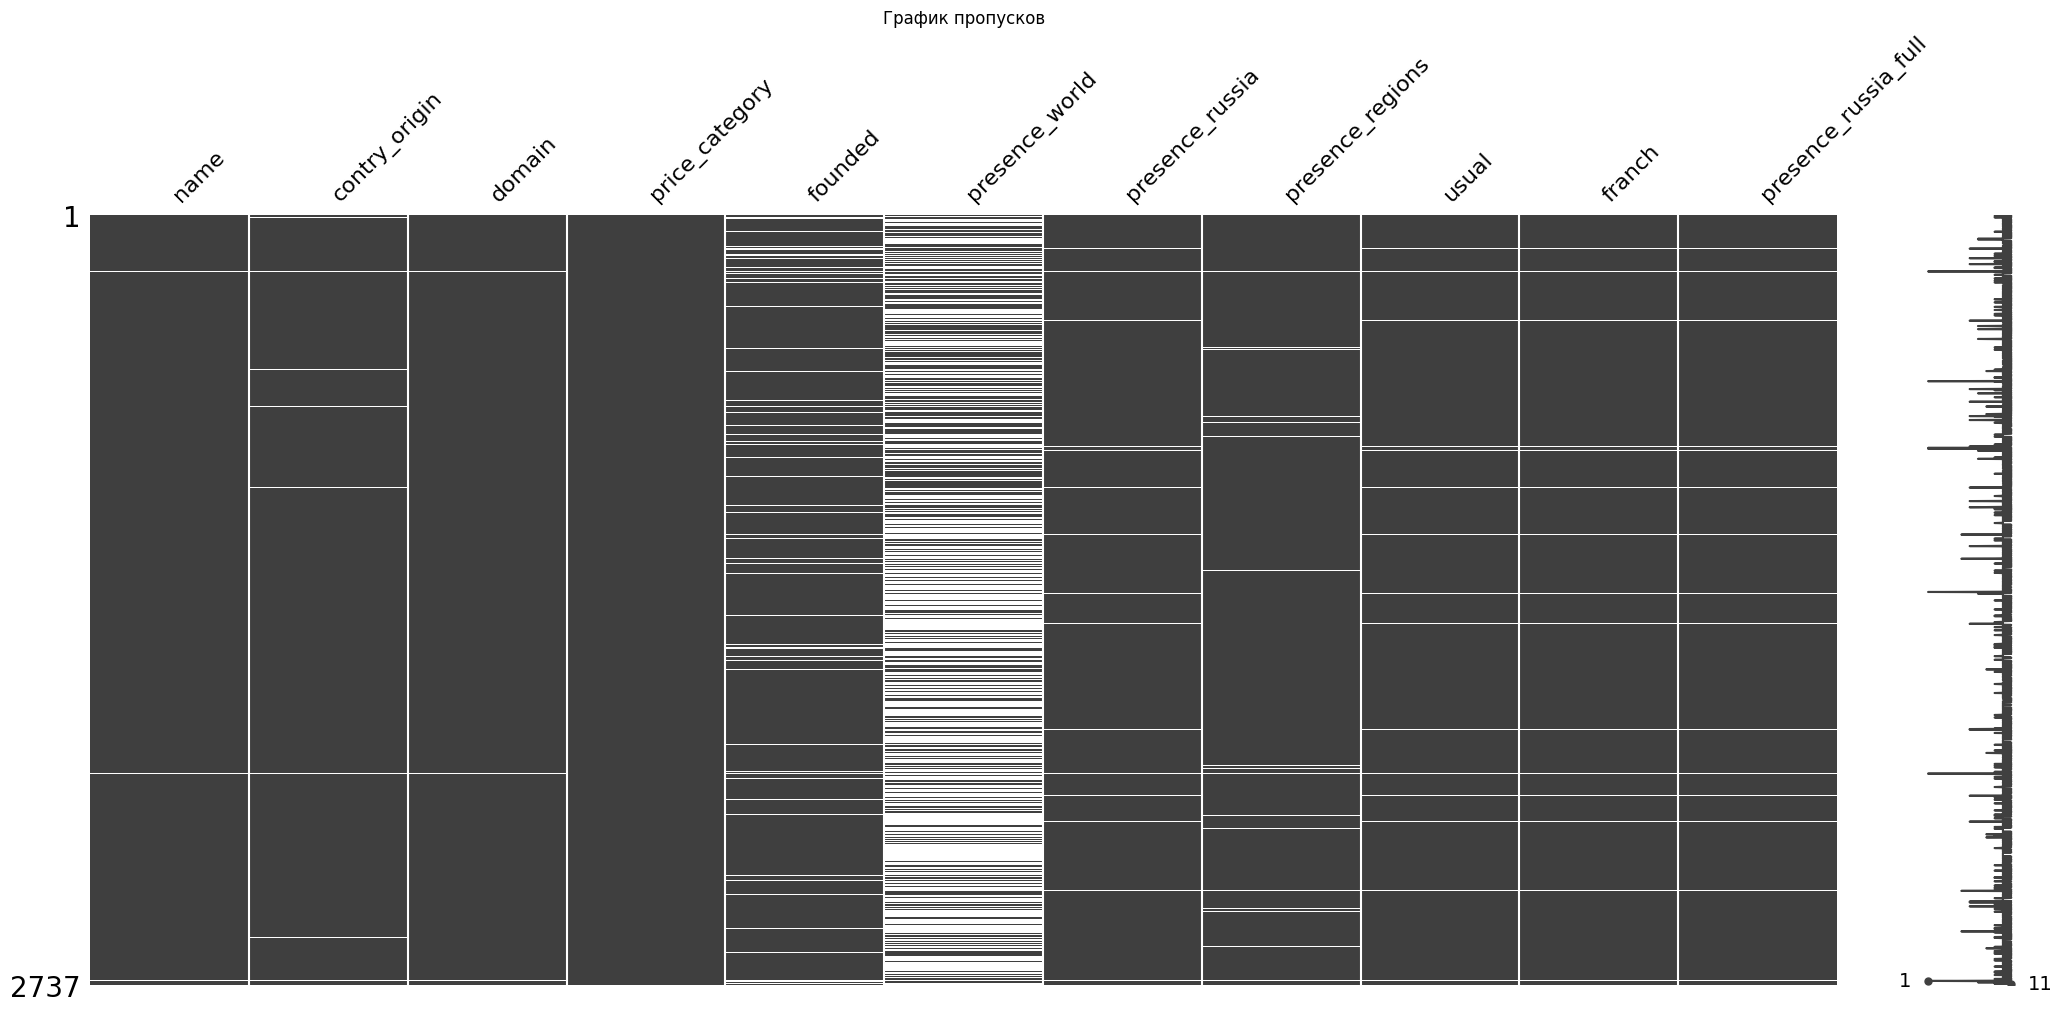

In [96]:
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
msno.matrix(df)
plt.title('График пропусков')
plt.show()

In [97]:
df = df.drop(['presence_world', 'presence_russia'], axis=1, inplace=False)
df = df.dropna()

## Обработка списковых значений

In [98]:
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full
0,Tamaris,Германия,Обувь,Средний; Выше среднего,1967.0,Москва; Санкт-Петербург; Барнаул; Бийск; Екате...,80.0,876.0,956.0
1,100 Столов,Россия,Мебель,Средний,2008.0,Брянск,4.0,0.0,4.0
2,1000 и одна сумка,Россия,Аксессуары,Ниже среднего; Средний,2003.0,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,69.0,45.0,114.0
4,1001 Платье,Россия,Одежда,Средний,2008.0,Москва; Санкт-Петербург,14.0,0.0,14.0
5,1001 тур,Россия,"Туризм, путешествия",Средний,2002.0,Москва; Санкт-Петербург; Архангельск; Балашиха...,157.0,170.0,327.0
...,...,...,...,...,...,...,...,...,...
2732,Яркий,Россия,Товары и услуги для детей,Ниже среднего; Средний,2011.0,Москва,10.0,0.0,10.0
2733,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",Средний,1995.0,Москва; Санкт-Петербург; Ростов-на-Дону,39.0,0.0,39.0
2734,Ярмарка Мебели,Россия,Мебель,Ниже среднего; Средний,2008.0,Москва; Санкт-Петербург; Астрахань; Барнаул; Б...,31.0,0.0,31.0
2735,Ярче!,Россия,Продукты питания,Ниже среднего; Средний,2012.0,Москва; Балашиха; Барнаул; Бийск; Видное; Воло...,400.0,0.0,400.0


In [99]:
df['price_category'].iloc[3].split('; ')

['Средний']

In [100]:
price_categories = []
new = []
for i in df['price_category']:
    new += sorted([i.split('; ')])
    price_categories += i.split('; ')
df['price_category'] = new
price_categories = list(set(price_categories))
price_categories

['Неизвестно',
 'Люкс / Премиум',
 'Средний',
 'Выше среднего',
 'Ниже среднего',
 'Дисконт']

In [101]:
region_categories = []
new = []
new2 = []
for i in df['presence_regions']:
    new += sorted([list(set(i.split('; ')))])
    new2 += [len(set(i.split('; ')))]
    region_categories += i.split('; ')
df['presence_regions'] = new
df['presence_regions_amount'] = new2

region_categories = list(set(region_categories))
len(region_categories)

297

In [102]:
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount
0,Tamaris,Германия,Обувь,"[Средний, Выше среднего]",1967.0,"[Новокузнецк, Новороссийск, Псков, Чебоксары, ...",80.0,876.0,956.0,25
1,100 Столов,Россия,Мебель,[Средний],2008.0,[Брянск],4.0,0.0,4.0,1
2,1000 и одна сумка,Россия,Аксессуары,"[Ниже среднего, Средний]",2003.0,"[Ялта, Ковров, Новороссийск, Псков, Великие Лу...",69.0,45.0,114.0,61
4,1001 Платье,Россия,Одежда,[Средний],2008.0,"[Москва, Санкт-Петербург]",14.0,0.0,14.0,2
5,1001 тур,Россия,"Туризм, путешествия",[Средний],2002.0,"[Курск, Новокузнецк, Владивосток, Серпухов, Ве...",157.0,170.0,327.0,38
...,...,...,...,...,...,...,...,...,...,...
2732,Яркий,Россия,Товары и услуги для детей,"[Ниже среднего, Средний]",2011.0,[Москва],10.0,0.0,10.0,1
2733,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",[Средний],1995.0,"[Ростов-на-Дону, Москва, Санкт-Петербург]",39.0,0.0,39.0,3
2734,Ярмарка Мебели,Россия,Мебель,"[Ниже среднего, Средний]",2008.0,"[Сургут, Воронеж, Астрахань, Санкт-Петербург, ...",31.0,0.0,31.0,21
2735,Ярче!,Россия,Продукты питания,"[Ниже среднего, Средний]",2012.0,"[Дубна, Звенигород, Новокузнецк, Ступино, Трои...",400.0,0.0,400.0,61


## Очистка выбросов

In [103]:
import pandas as pd

def IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

df = IQR(df, 'presence_russia_full')
df = IQR(df, 'founded')
df = IQR(df, 'presence_regions_amount')

df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount
1,100 Столов,Россия,Мебель,[Средний],2008.0,[Брянск],4.0,0.0,4.0,1
4,1001 Платье,Россия,Одежда,[Средний],2008.0,"[Москва, Санкт-Петербург]",14.0,0.0,14.0,2
6,12 Талеров,Россия,Хобби и увлечения,"[Средний, Выше среднего]",2008.0,[Москва],2.0,0.0,2.0,1
7,12Storeez,Россия,Одежда,[Средний],2014.0,"[Сочи, Казань, Новосибирск, Ростов-на-Дону, Мо...",19.0,0.0,19.0,9
9,13 Rules,Россия,"Кафе, ресторан",[Средний],2012.0,"[Новосибирск, Воронеж, Москва, Санкт-Петербург...",3.0,30.0,33.0,7
...,...,...,...,...,...,...,...,...,...,...
2730,Япоша,Россия,"Кафе, ресторан",[Средний],2005.0,"[Мытищи, Москва, Королев, Щелково]",5.0,0.0,5.0,4
2732,Яркий,Россия,Товары и услуги для детей,"[Ниже среднего, Средний]",2011.0,[Москва],10.0,0.0,10.0,1
2733,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",[Средний],1995.0,"[Ростов-на-Дону, Москва, Санкт-Петербург]",39.0,0.0,39.0,3
2734,Ярмарка Мебели,Россия,Мебель,"[Ниже среднего, Средний]",2008.0,"[Сургут, Воронеж, Астрахань, Санкт-Петербург, ...",31.0,0.0,31.0,21


## Обработка по стране основания

In [104]:
import pandas as pd

replace_dict = {
    'Россия ': 'Россия',
    'России': 'Россия',
    'Росия': 'Россия',
    'США': 'США',
    'USA': 'США',
    'Республика Беларусь': 'Беларусь',
    'Беларусь': 'Беларусь',
    'Америка': 'США',
    'Великобритания': 'Англия',
    'Англия': 'Англия',
    'Европа': 'Европа',
    'Италия, Франция': 'Европа',
    'Дания, Копенгаген': 'Дания',
    'Швеция-Германия': 'Европа',
}
df['contry_origin'] = df['contry_origin'].replace(replace_dict)


def group_countries(value):
    europe_countries = ['Англия', 'Германия', 'Франция', 'Италия', 'Испания', 'Польша', 'Австрия', 'Швеция', 'Финляндия', 'Дания', 'Нидерланды', 'Бельгия', 'Норвегия', 'Португалия', 'Венгрия', 'Чехия', 'Латвия', 'Литва', 'Сербия', 'Греция', 'Швейцария', 'Молдавия', 'Голландия']
    asia_countries = ['Китай', 'Южная Корея', 'Корея', 'Шри-Ланка', 'Вьетнам', 'Израиль', 'Индия', 'Грузия', 'Япония']
    america_countries = ['США', 'Канада', 'Мексика', 'Америка', 'Бразилия']
    middle_east_countries = ['Турция', 'Израиль']
    oceania_countries = ['Австралия']
    cis_countries = ['Беларусь', 'Украина', 'Молдавия', 'Грузия']

    if value in europe_countries:
        return 'Европа'
    elif value in asia_countries:
        return 'Азия'
    elif value in america_countries:
        return 'Америка'
    elif value in middle_east_countries:
        return 'Ближний Восток'
    elif value in oceania_countries:
        return 'Океания'
    elif value in cis_countries:
        return 'СНГ'
    else:
        return value
df['contry_origin'] = df['contry_origin'].apply(group_countries)
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount
1,100 Столов,Россия,Мебель,[Средний],2008.0,[Брянск],4.0,0.0,4.0,1
4,1001 Платье,Россия,Одежда,[Средний],2008.0,"[Москва, Санкт-Петербург]",14.0,0.0,14.0,2
6,12 Талеров,Россия,Хобби и увлечения,"[Средний, Выше среднего]",2008.0,[Москва],2.0,0.0,2.0,1
7,12Storeez,Россия,Одежда,[Средний],2014.0,"[Сочи, Казань, Новосибирск, Ростов-на-Дону, Мо...",19.0,0.0,19.0,9
9,13 Rules,Россия,"Кафе, ресторан",[Средний],2012.0,"[Новосибирск, Воронеж, Москва, Санкт-Петербург...",3.0,30.0,33.0,7
...,...,...,...,...,...,...,...,...,...,...
2730,Япоша,Россия,"Кафе, ресторан",[Средний],2005.0,"[Мытищи, Москва, Королев, Щелково]",5.0,0.0,5.0,4
2732,Яркий,Россия,Товары и услуги для детей,"[Ниже среднего, Средний]",2011.0,[Москва],10.0,0.0,10.0,1
2733,Яркий фотомаркет,Россия,"Сотовые телефоны, электроника, фото",[Средний],1995.0,"[Ростов-на-Дону, Москва, Санкт-Петербург]",39.0,0.0,39.0,3
2734,Ярмарка Мебели,Россия,Мебель,"[Ниже среднего, Средний]",2008.0,"[Сургут, Воронеж, Астрахань, Санкт-Петербург, ...",31.0,0.0,31.0,21


## Убираем дублирование

In [105]:
df = df.sort_values(by='presence_russia_full')
df = df.drop_duplicates(subset=['name', 'contry_origin', 'domain', 'founded'], keep='last')
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount
567,Liu Jo,Европа,Мебель,[Средний],1995.0,[Сочи],1.0,0.0,1.0,1
510,KidZania,Америка,Развлечения,[Средний],1999.0,[Москва],1.0,0.0,1.0,1
1391,Два шага,Россия,Продукты питания,[Средний],1995.0,[Красноярск],1.0,0.0,1.0,1
970,UGG,Америка,Обувь,"[Выше среднего, Люкс / Премиум]",1978.0,[Москва],1.0,0.0,1.0,1
2118,Подрастайка,Россия,Товары и услуги для детей,[Средний],2013.0,[Тула],1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
1351,Гармония здоровья,Россия,Аптека,[Средний],2011.0,"[Сочи, Новосибирск, Анжеро-Судженск, Красноярс...",140.0,0.0,140.0,14
1233,Буквоед,Россия,Книги и печатные издания,[Средний],2000.0,"[Псков, Северодвинск, Великие Луки, Череповец,...",140.0,0.0,140.0,12
1997,Океан Камчатка Сахалин,Россия,Продукты питания,[Средний],1998.0,"[Краснодар, Сочи, Пятигорск]",42.0,100.0,142.0,3
2328,СмартОптик,Россия,Оптика,[Средний],2003.0,"[Магнитогорск, Санкт-Петербург]",136.0,8.0,144.0,2


## Проверки

In [106]:
df = df[df['presence_russia_full'] >= df['presence_regions_amount']]
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount
567,Liu Jo,Европа,Мебель,[Средний],1995.0,[Сочи],1.0,0.0,1.0,1
510,KidZania,Америка,Развлечения,[Средний],1999.0,[Москва],1.0,0.0,1.0,1
1391,Два шага,Россия,Продукты питания,[Средний],1995.0,[Красноярск],1.0,0.0,1.0,1
970,UGG,Америка,Обувь,"[Выше среднего, Люкс / Премиум]",1978.0,[Москва],1.0,0.0,1.0,1
2118,Подрастайка,Россия,Товары и услуги для детей,[Средний],2013.0,[Тула],1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
1351,Гармония здоровья,Россия,Аптека,[Средний],2011.0,"[Сочи, Новосибирск, Анжеро-Судженск, Красноярс...",140.0,0.0,140.0,14
1233,Буквоед,Россия,Книги и печатные издания,[Средний],2000.0,"[Псков, Северодвинск, Великие Луки, Череповец,...",140.0,0.0,140.0,12
1997,Океан Камчатка Сахалин,Россия,Продукты питания,[Средний],1998.0,"[Краснодар, Сочи, Пятигорск]",42.0,100.0,142.0,3
2328,СмартОптик,Россия,Оптика,[Средний],2003.0,"[Магнитогорск, Санкт-Петербург]",136.0,8.0,144.0,2


In [107]:
df['point_for_region'] = df['presence_russia_full'] / df['presence_regions_amount']

<ipython-input-107-059257f158c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['point_for_region'] = df['presence_russia_full'] / df['presence_regions_amount']


In [108]:
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount,point_for_region
567,Liu Jo,Европа,Мебель,[Средний],1995.0,[Сочи],1.0,0.0,1.0,1,1.000000
510,KidZania,Америка,Развлечения,[Средний],1999.0,[Москва],1.0,0.0,1.0,1,1.000000
1391,Два шага,Россия,Продукты питания,[Средний],1995.0,[Красноярск],1.0,0.0,1.0,1,1.000000
970,UGG,Америка,Обувь,"[Выше среднего, Люкс / Премиум]",1978.0,[Москва],1.0,0.0,1.0,1,1.000000
2118,Подрастайка,Россия,Товары и услуги для детей,[Средний],2013.0,[Тула],1.0,0.0,1.0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
1351,Гармония здоровья,Россия,Аптека,[Средний],2011.0,"[Сочи, Новосибирск, Анжеро-Судженск, Красноярс...",140.0,0.0,140.0,14,10.000000
1233,Буквоед,Россия,Книги и печатные издания,[Средний],2000.0,"[Псков, Северодвинск, Великие Луки, Череповец,...",140.0,0.0,140.0,12,11.666667
1997,Океан Камчатка Сахалин,Россия,Продукты питания,[Средний],1998.0,"[Краснодар, Сочи, Пятигорск]",42.0,100.0,142.0,3,47.333333
2328,СмартОптик,Россия,Оптика,[Средний],2003.0,"[Магнитогорск, Санкт-Петербург]",136.0,8.0,144.0,2,72.000000


## Цифры

In [109]:
df['presence_russia_full'].sum()

41790.0

In [110]:
len(region_categories)

297

In [111]:
ans = 0
for i in df['presence_regions']: ans += 'Москва' in i
ans

957

1619 ритейлеров

41790 торговых точек

297 регионов присутствия

957 количество ритейлеров с точкой в Москве

In [112]:
df.describe()

,founded,usual,franch,presence_russia_full,presence_regions_amount,point_for_region
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,2003.526801,19.361960,4.724496,24.086455,5.459942,7.478132
std,8.810072,22.801949,13.526392,25.840887,5.499762,10.639282
min,1973.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1997.000000,5.000000,0.000000,7.000000,1.000000,2.121324
50%,2004.000000,11.000000,0.000000,15.000000,3.000000,4.000000
75%,2010.500000,24.000000,1.000000,30.000000,8.000000,7.386752
max,2020.000000,144.000000,122.000000,144.000000,24.000000,95.000000


## Визуализации



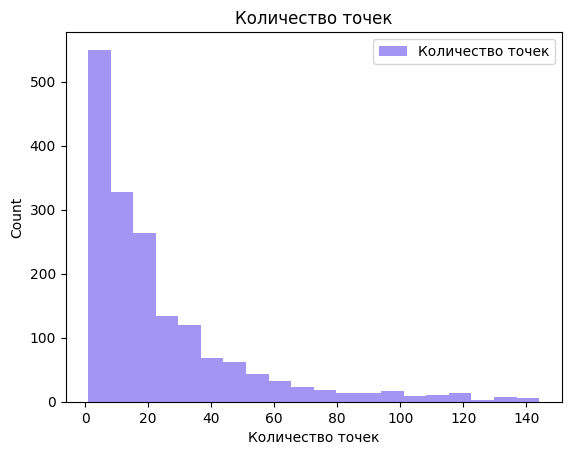

In [113]:
import matplotlib.pyplot as plt

plt.hist(df['presence_russia_full'], bins=20, color='mediumslateblue', alpha=0.7, label="Количество точек")

plt.title('Количество точек')
plt.xlabel('Количество точек')
plt.ylabel('Count')
plt.legend()
plt.show()

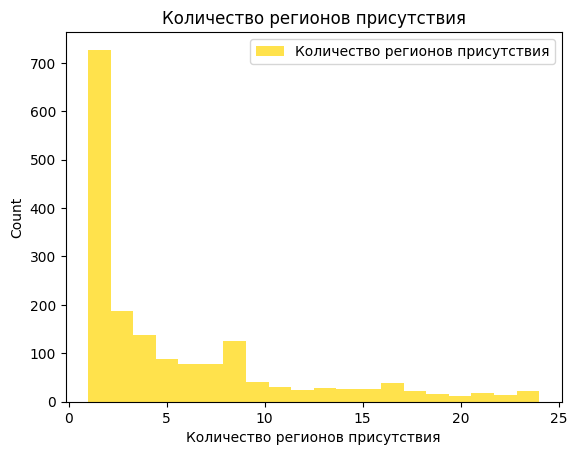

In [114]:
import matplotlib.pyplot as plt

plt.hist(df['presence_regions_amount'], bins=20, color='gold', alpha=0.7, label="Количество регионов присутствия")

plt.title('Количество регионов присутствия')
plt.xlabel('Количество регионов присутствия')
plt.ylabel('Count')
plt.legend()
plt.show()

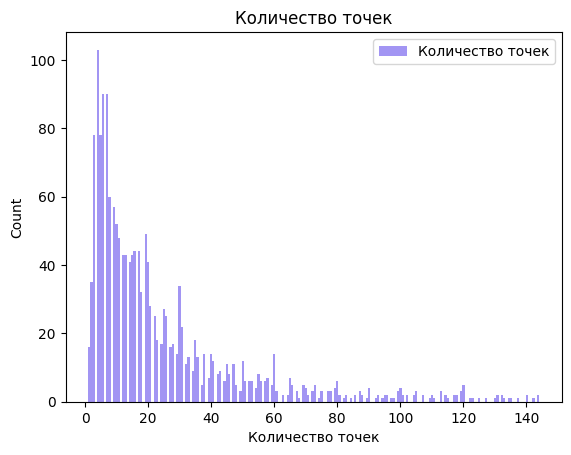

In [115]:
import matplotlib.pyplot as plt

plt.hist(df['presence_russia_full'], bins=200, color='mediumslateblue', alpha=0.7, label="Количество точек")

plt.title('Количество точек')
plt.xlabel('Количество точек')
plt.ylabel('Count')
plt.legend()
plt.show()

## Разделение на группы

In [116]:
df['presence_russia_full_category'] = pd.cut(df['presence_russia_full'], bins=[0, 25, 50, 75, 100, 1000], labels=['0-25', '26-50', '51-75', '76-100', '100+'])

<ipython-input-116-fd26d9fe854b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['presence_russia_full_category'] = pd.cut(df['presence_russia_full'], bins=[0, 25, 50, 75, 100, 1000], labels=['0-25', '26-50', '51-75', '76-100', '100+'])


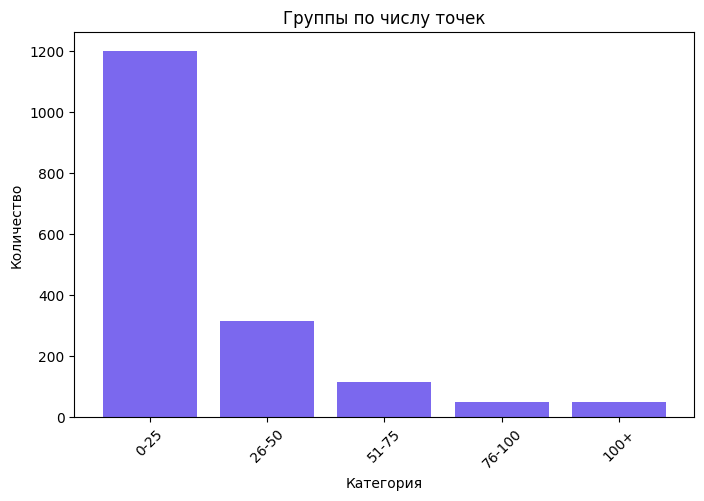

In [117]:
import matplotlib.pyplot as plt
category_counts=df['presence_russia_full_category'].value_counts().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(category_counts['presence_russia_full_category'], category_counts['count'], color='mediumslateblue')

plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Группы по числу точек')
plt.xticks(rotation=45)

plt.show()

## Количество точек по регионам

In [118]:
from collections import Counter

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df.groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
f['presence_regions'] = f['presence_regions'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['presence_regions'] = f['presence_regions'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})
f['presence_regions'] = f['presence_regions'].map(five)

f

<ipython-input-118-67c7791fbfeb>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df.groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
<ipython-input-118-67c7791fbfeb>:7: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df.groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()


,presence_russia_full_category,presence_regions
0,0-25,"{'Москва': 0.14441774087830456, 'Санкт-Петербу..."
1,26-50,"{'Москва': 0.0654911838790932, 'Санкт-Петербур..."
2,51-75,"{'Москва': 0.055865921787709494, 'Санкт-Петерб..."
3,76-100,"{'Москва': 0.05747126436781609, 'Санкт-Петербу..."
4,100+,"{'Москва': 0.046065259117082535, 'Санкт-Петерб..."


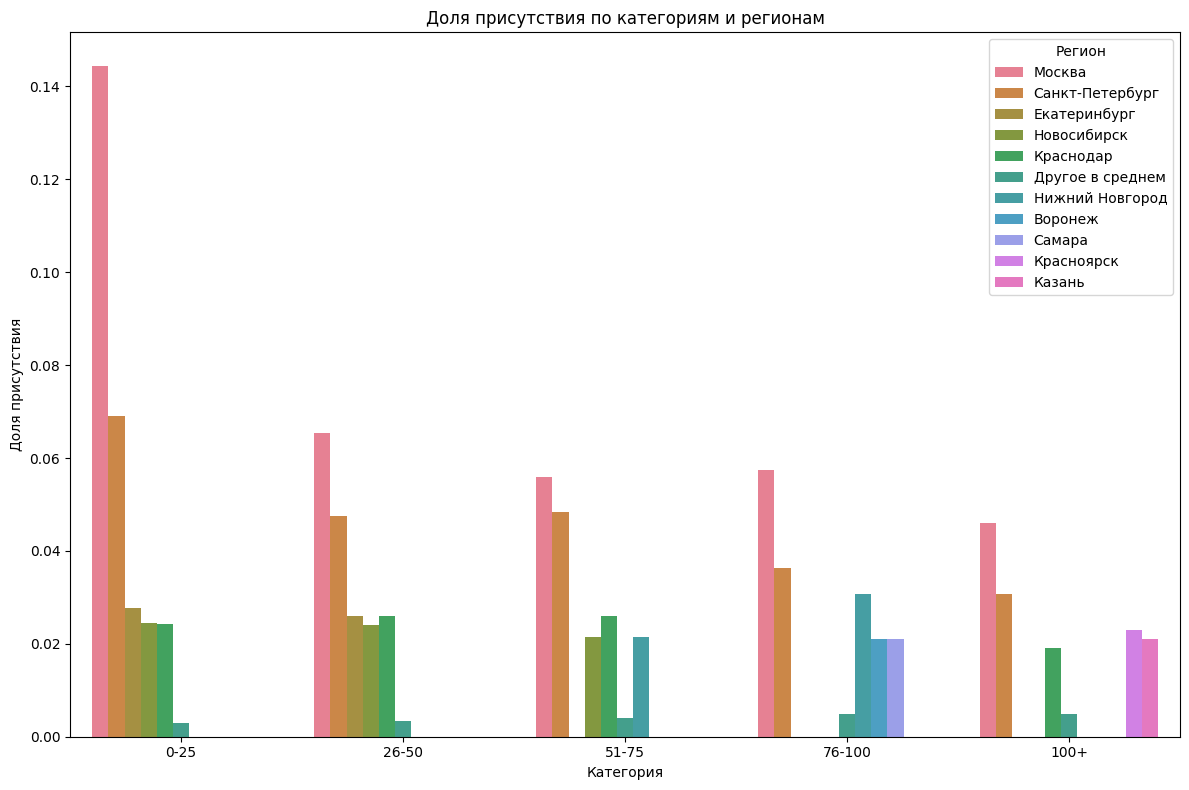

In [119]:
import seaborn as sns

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['presence_regions']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Region': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Region', dodge=True)
plt.title('Доля присутствия по категориям и регионам')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

## Количество точек по категориям предприятий

In [120]:
df['domain'].value_counts()#Кафе, ресторан; Одежда; Продукты питания

,count
domain,
"Кафе, ресторан",246
Одежда,212
Продукты питания,200
Товары и услуги для детей,89
Красота,78
Все для дома,66
Ремонт и строительство,65
Спорт,62
Парфюмерия и Косметика,55


<ipython-input-121-21e4ec03f244>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
<ipython-input-121-21e4ec03f244>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()


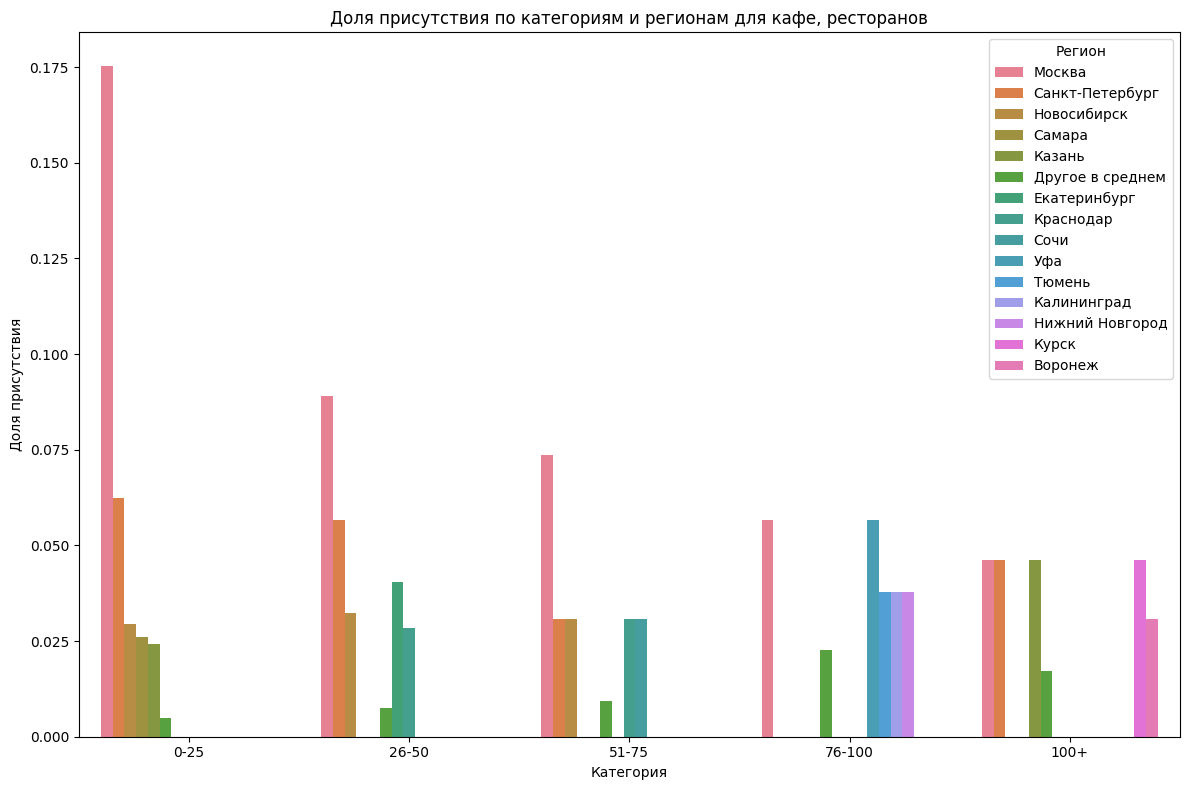

In [121]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
f['presence_regions'] = f['presence_regions'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['presence_regions'] = f['presence_regions'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})
f['presence_regions'] = f['presence_regions'].map(five)

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['presence_regions']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Region': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Region', dodge=True)
plt.title('Доля присутствия по категориям и регионам для кафе, ресторанов')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

<ipython-input-122-e31111b94997>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
<ipython-input-122-e31111b94997>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()


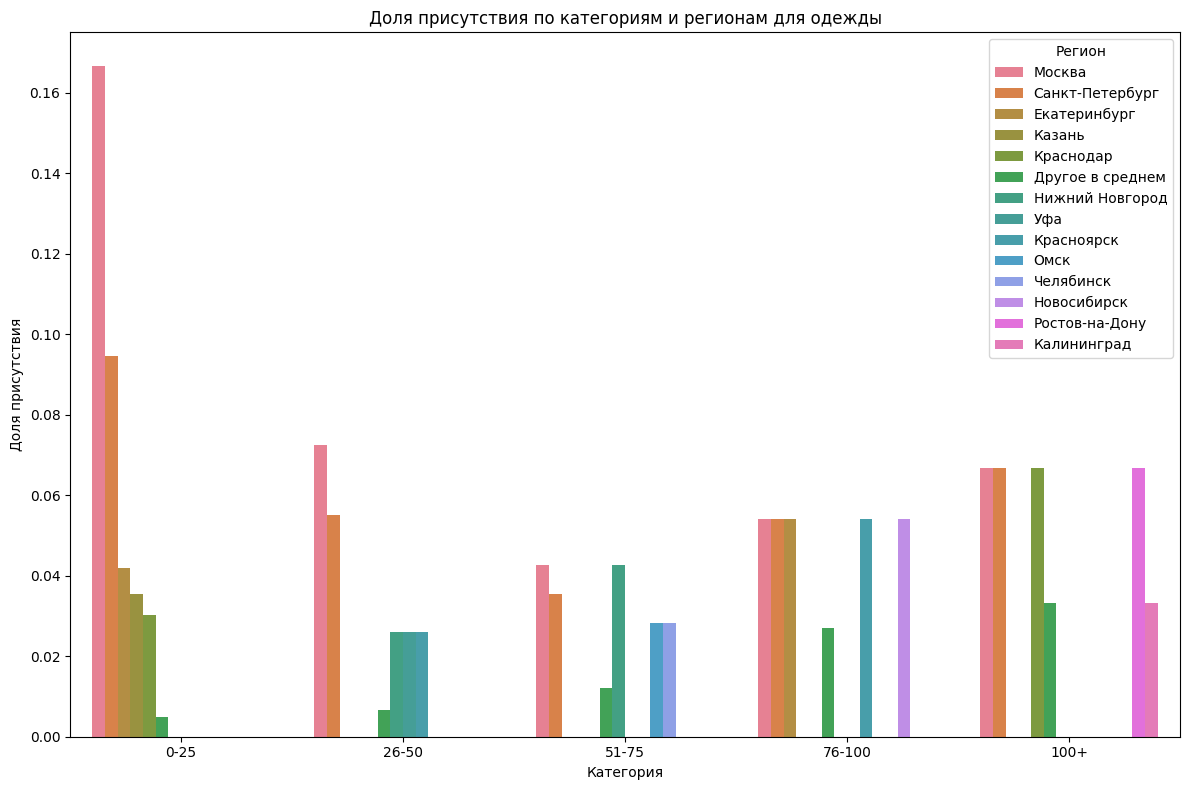

In [122]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
f['presence_regions'] = f['presence_regions'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['presence_regions'] = f['presence_regions'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})
f['presence_regions'] = f['presence_regions'].map(five)

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['presence_regions']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Region': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Region', dodge=True)
plt.title('Доля присутствия по категориям и регионам для одежды')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

<ipython-input-123-8866ebe71faf>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
<ipython-input-123-8866ebe71faf>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()


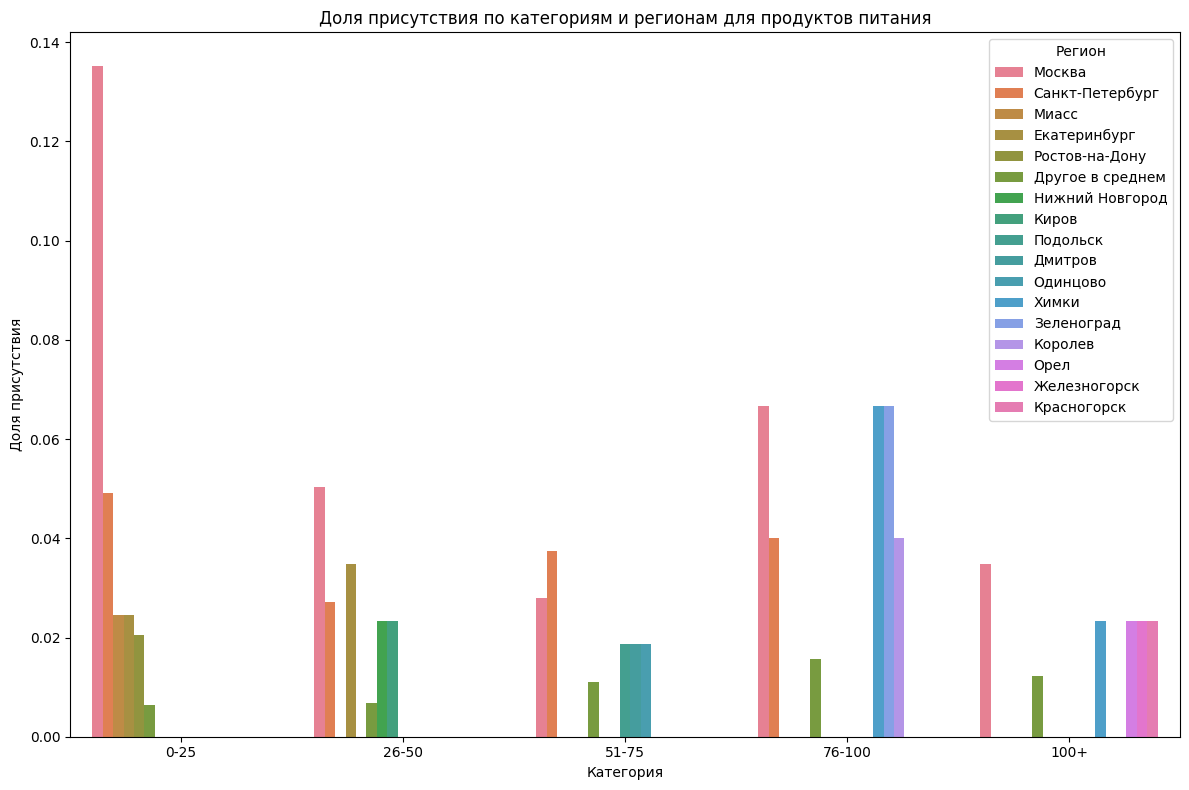

In [123]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['presence_regions'].agg(sum).reset_index()
f['presence_regions'] = f['presence_regions'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['presence_regions'] = f['presence_regions'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})
f['presence_regions'] = f['presence_regions'].map(five)

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['presence_regions']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Region': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Region', dodge=True)
plt.title('Доля присутствия по категориям и регионам для продуктов питания')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

In [124]:
df

,name,contry_origin,domain,price_category,founded,presence_regions,usual,franch,presence_russia_full,presence_regions_amount,point_for_region,presence_russia_full_category
567,Liu Jo,Европа,Мебель,[Средний],1995.0,[Сочи],1.0,0.0,1.0,1,1.000000,0-25
510,KidZania,Америка,Развлечения,[Средний],1999.0,[Москва],1.0,0.0,1.0,1,1.000000,0-25
1391,Два шага,Россия,Продукты питания,[Средний],1995.0,[Красноярск],1.0,0.0,1.0,1,1.000000,0-25
970,UGG,Америка,Обувь,"[Выше среднего, Люкс / Премиум]",1978.0,[Москва],1.0,0.0,1.0,1,1.000000,0-25
2118,Подрастайка,Россия,Товары и услуги для детей,[Средний],2013.0,[Тула],1.0,0.0,1.0,1,1.000000,0-25
...,...,...,...,...,...,...,...,...,...,...,...,...
1351,Гармония здоровья,Россия,Аптека,[Средний],2011.0,"[Сочи, Новосибирск, Анжеро-Судженск, Красноярс...",140.0,0.0,140.0,14,10.000000,100+
1233,Буквоед,Россия,Книги и печатные издания,[Средний],2000.0,"[Псков, Северодвинск, Великие Луки, Череповец,...",140.0,0.0,140.0,12,11.666667,100+
1997,Океан Камчатка Сахалин,Россия,Продукты питания,[Средний],1998.0,"[Краснодар, Сочи, Пятигорск]",42.0,100.0,142.0,3,47.333333,100+
2328,СмартОптик,Россия,Оптика,[Средний],2003.0,"[Магнитогорск, Санкт-Петербург]",136.0,8.0,144.0,2,72.000000,100+


<ipython-input-125-15adfefb46b5>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df.groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
<ipython-input-125-15adfefb46b5>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df.groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()


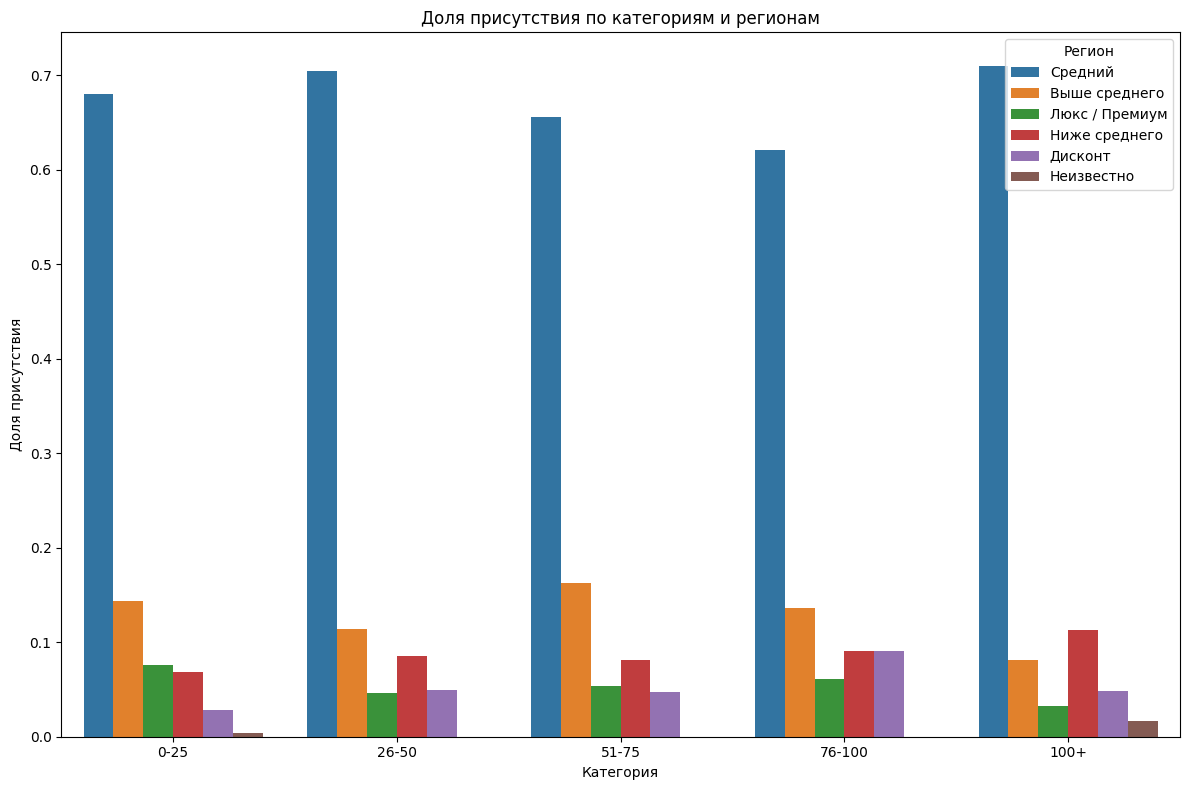

In [125]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df.groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
f['price_category'] = f['price_category'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['price_category'] = f['price_category'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['price_category']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Price': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Price', dodge=True)
plt.title('Доля присутствия по категориям и регионам')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

## Графики по каждому типу предприятий

<ipython-input-126-cbbcb4425338>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
<ipython-input-126-cbbcb4425338>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()


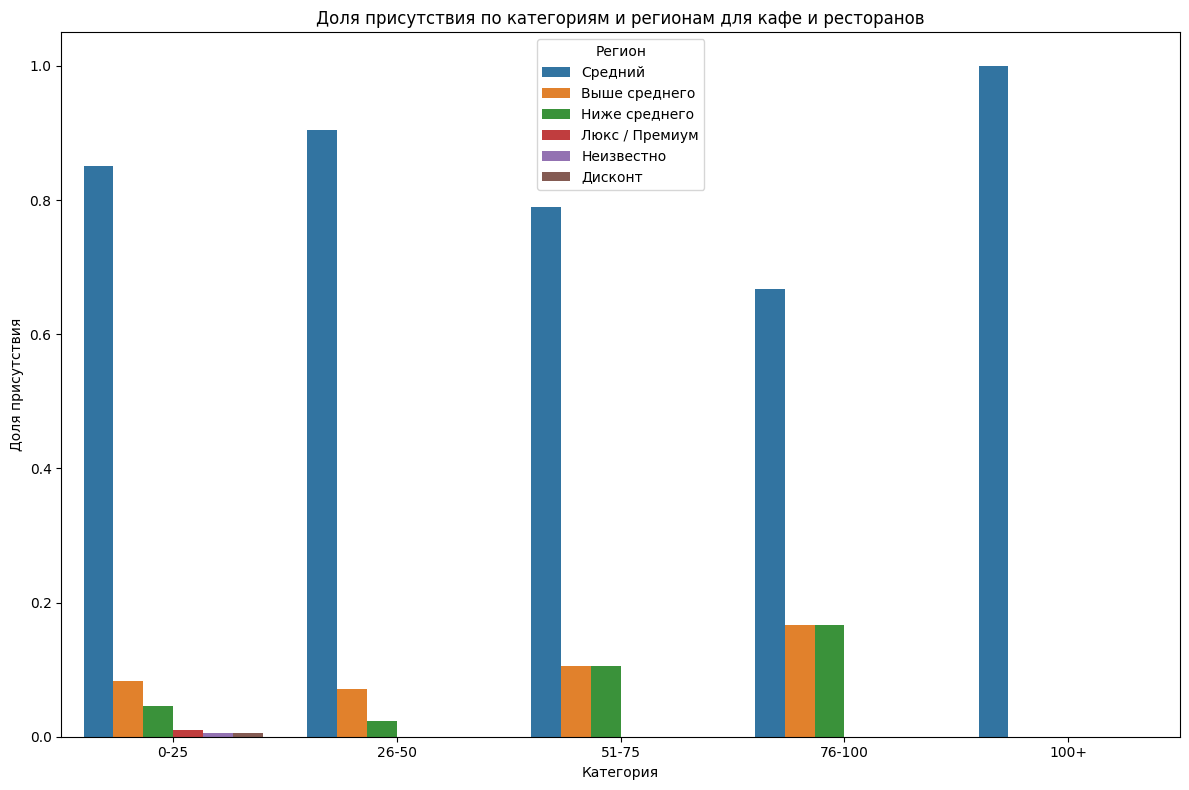

In [126]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Кафе, ресторан'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
f['price_category'] = f['price_category'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['price_category'] = f['price_category'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['price_category']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Price': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Price', dodge=True)
plt.title('Доля присутствия по категориям и регионам для кафе и ресторанов')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

<ipython-input-127-8af1ba71d2ac>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
<ipython-input-127-8af1ba71d2ac>:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()


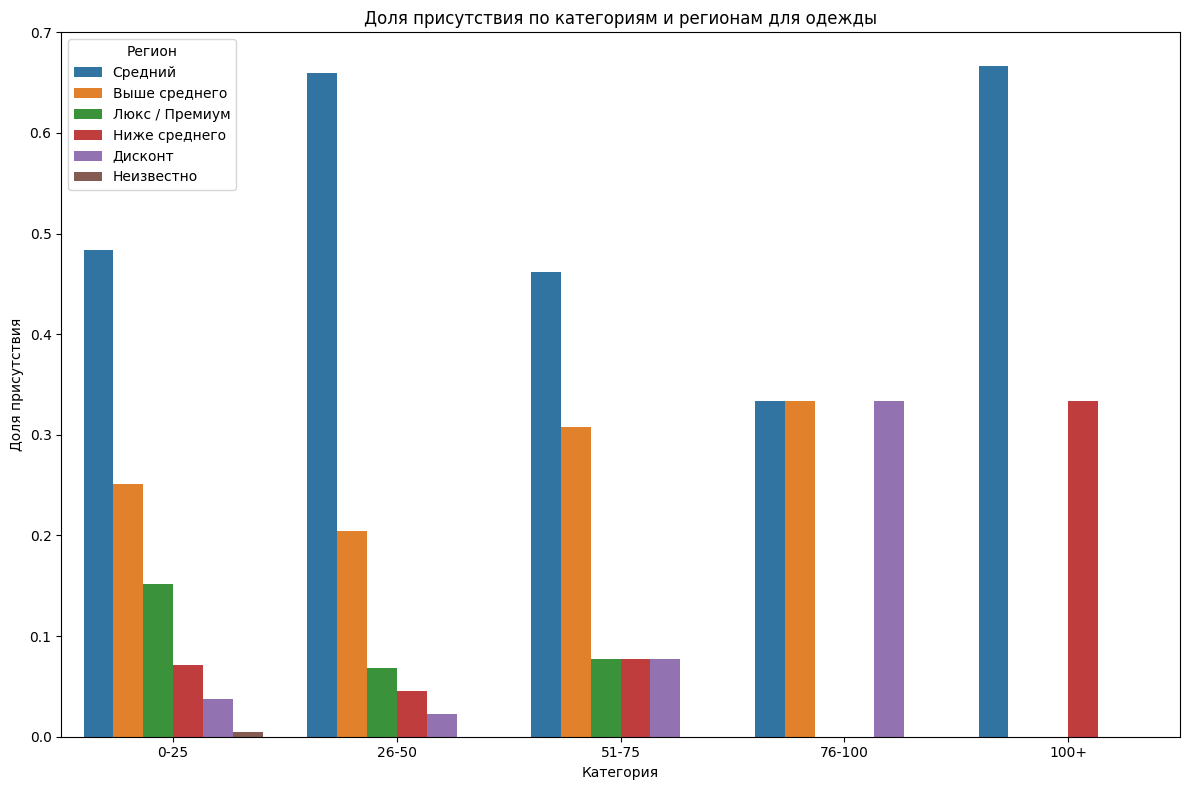

In [127]:
from collections import Counter
import seaborn as sns

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Одежда'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
f['price_category'] = f['price_category'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['price_category'] = f['price_category'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['price_category']
    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Price': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Price', dodge=True)
plt.title('Доля присутствия по категориям и регионам для одежды')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

<ipython-input-128-8678eb66fa77>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
<ipython-input-128-8678eb66fa77>:7: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()


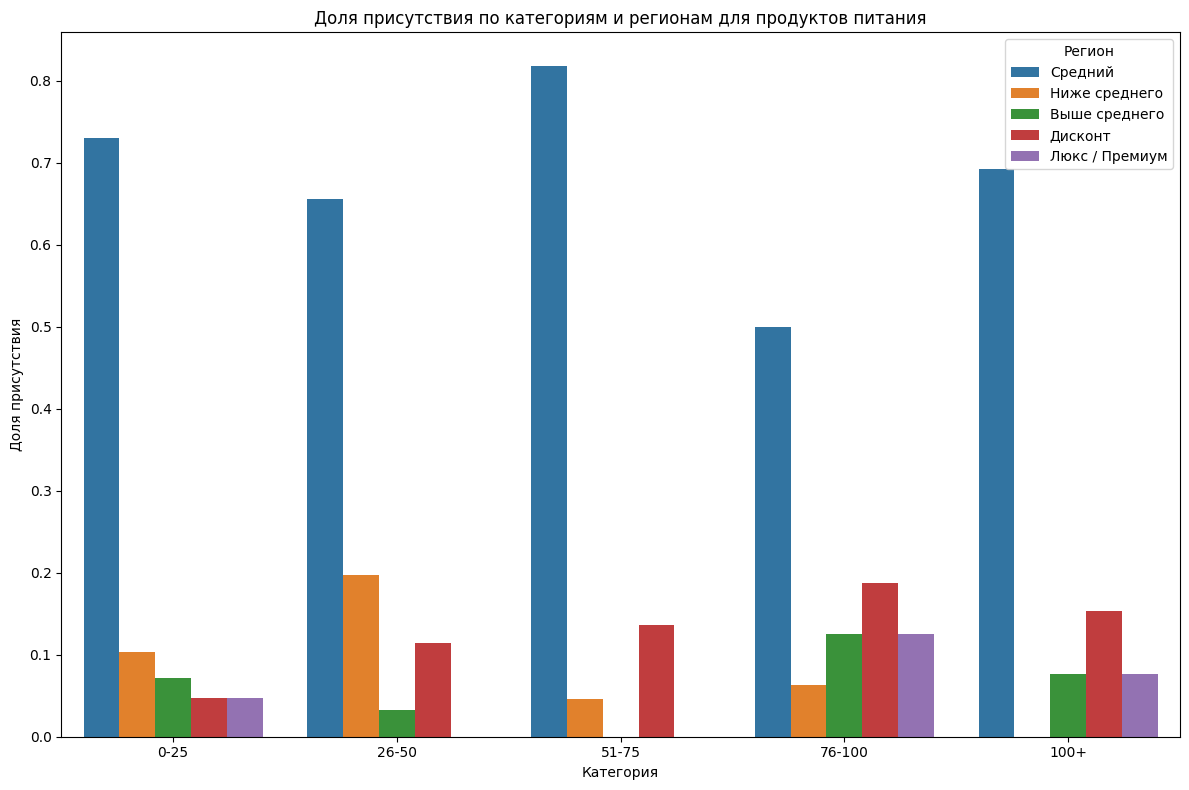

In [128]:
from collections import Counter

def five(x):
  r = dict(list(x.items())[:5])
  r['Другое в среднем'] = sum(list(x.values())[5:]) / (len(x) - 5)
  return r
f = df[df['domain'] == 'Продукты питания'].groupby(['presence_russia_full_category'])['price_category'].agg(sum).reset_index()
f['price_category'] = f['price_category'].map(lambda x: dict(sorted(dict(Counter(x)).items(), key = lambda i: -i[1])))
f['price_category'] = f['price_category'].map(lambda x: {k: v / sum(x.values()) for k, v in x.items()})

import seaborn as sns

plot_data = []

for i in range(len(f)):
    category = f.iloc[i]['presence_russia_full_category']
    regions = f.iloc[i]['price_category']

    for region, proportion in regions.items():
        plot_data.append({'Category': category, 'Price': region, 'Proportion': proportion})

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Category', y='Proportion', hue='Price', dodge=True)

plt.title('Доля присутствия по категориям и регионам для продуктов питания')
plt.xlabel('Категория')
plt.ylabel('Доля присутствия')
plt.legend(title='Регион')

plt.tight_layout()
plt.show()